In [159]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MAE Model Visualization

In [160]:
import viz

## Load pre-trained MAE model

In [161]:
common_architecture = "mae_vit_tiny"

model1 = viz.prepare_model(
    chkpt_dir=f"out_{common_architecture}_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-mse",
    arch=common_architecture
)

model2 = viz.prepare_model(
    chkpt_dir=f"out_{common_architecture}_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-l1",
    arch=common_architecture
)

models = {"SDP - MSE": model1, "SDP - L1": model2}

Loading checkpoint:  ../Model_Saving/out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200-mse/checkpoint-199.pth
args: {'batch_size': 512, 'epochs': 200, 'accum_iter': 1, 'model_type': None, 'model': 'mae_vit_tiny', 'input_size': 64, 'patch_size': 8, 'attn_name': 'scaled_dot_product', 'ffn_name': 'MLP', 'use_xformers': True, 'mask_ratio': 0.75, 'spatial_mask': False, 'norm_pix_loss': False, 'weight_decay': 0.05, 'lr': 0.002, 'blr': 0.001, 'min_lr': 0.0, 'warmup_epochs': 40, 'train_path': '../fmow-rgb-preproc/train_64.csv', 'dataset_type': 'rgb', 'masked_bands': None, 'dropped_bands': None, 'grouped_bands': [], 'output_dir': '../Model_Saving/out_mae_vit_tiny_xformers_scaled_dot_product_MLP_i64_p8_b512_e200', 'log_dir': './logs', 'device': 'cuda', 'seed': 0, 'resume': '', 'wandb': 'satmae_debug', 'wandb_entity': 'utk-iccv23', 'start_epoch': 0, 'num_workers': 10, 'pin_mem': True, 'world_size': 1, 'local_rank': 0, 'dist_on_itp': False, 'dist_url': 'env://', 'distributed': Fals

## Run on selected images from './images' folder

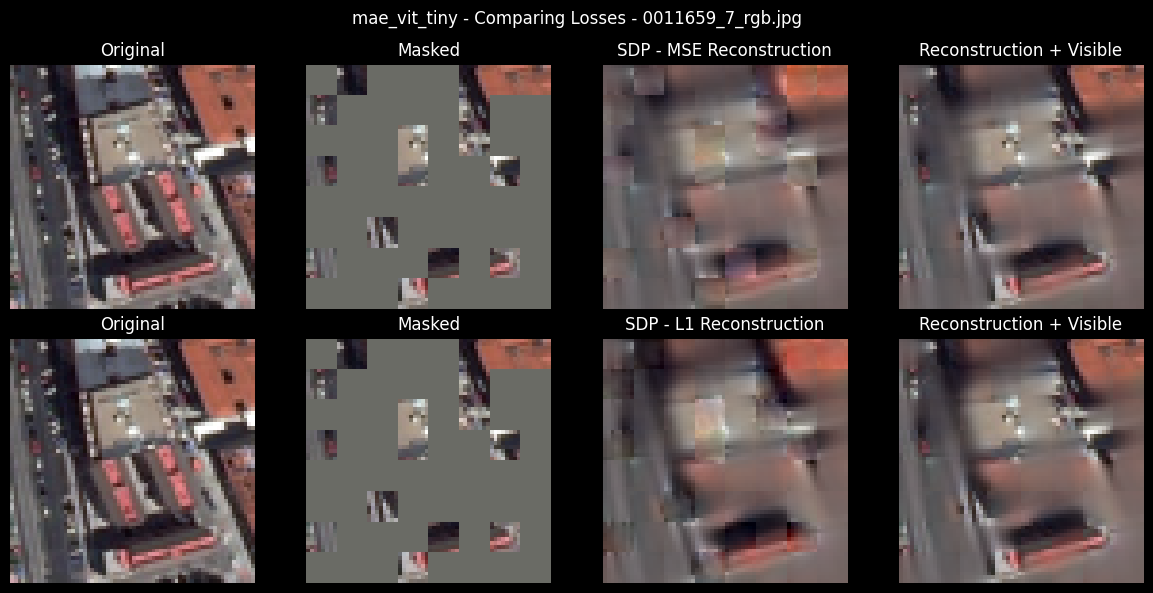

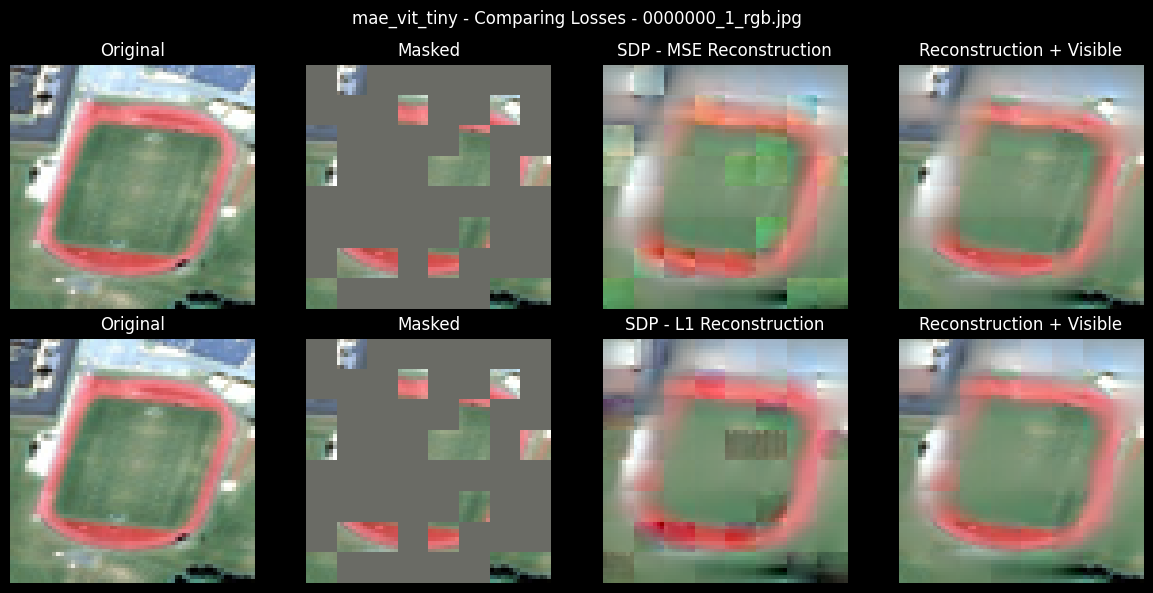

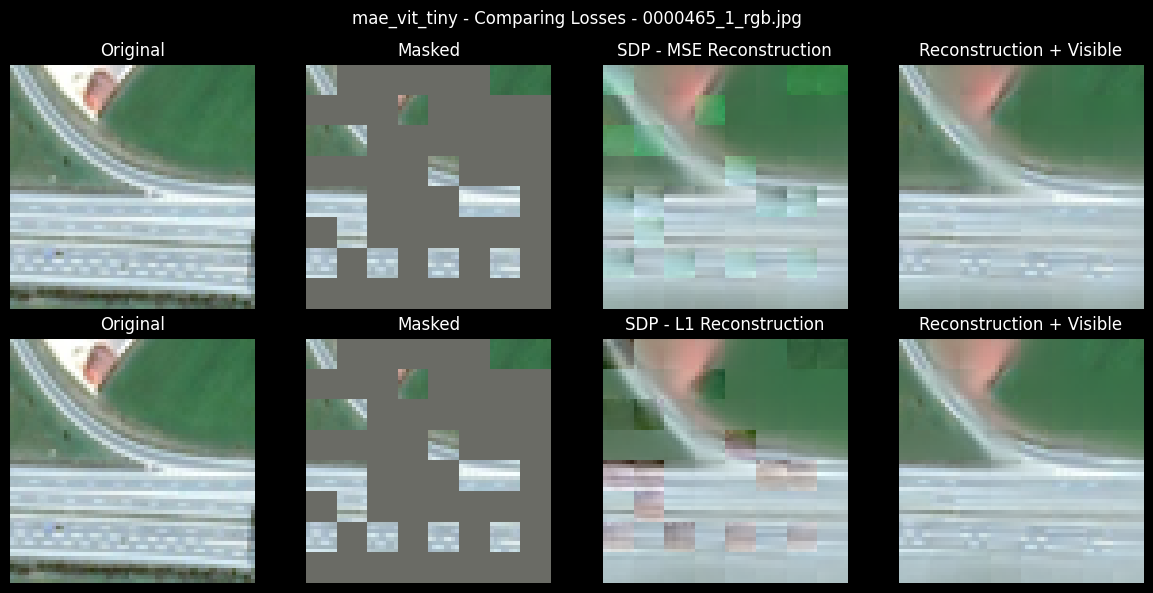

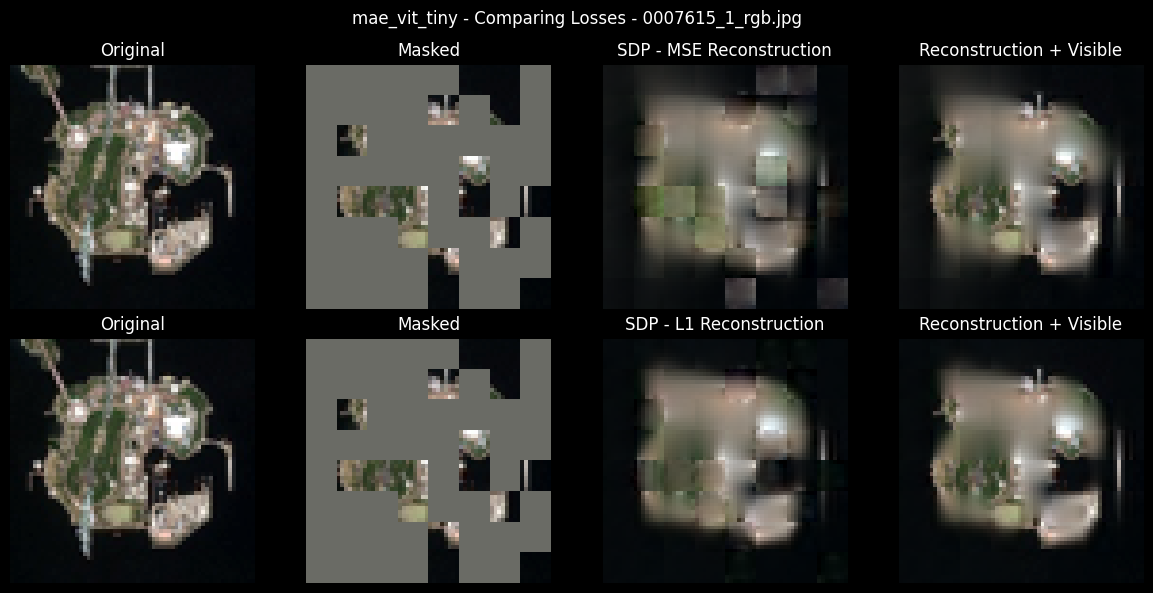

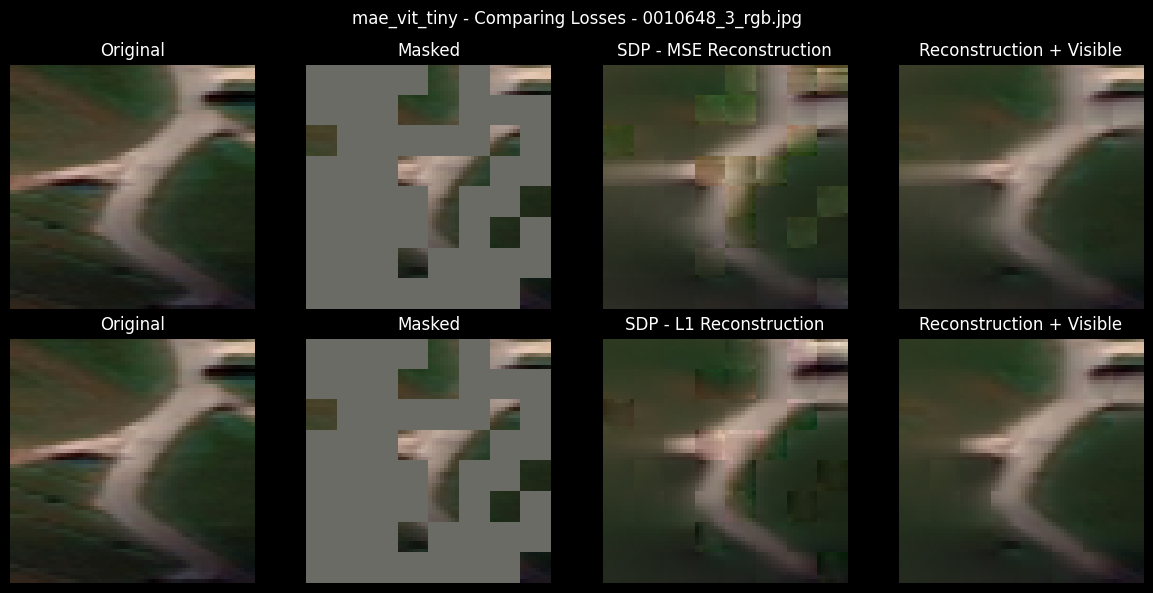

In [162]:
viz.plot_comp_many(
    models,
    "./images",
    base_title=f"{common_architecture} - Comparing Losses",
    maskseed=None,
)

## Run on random images from the test set

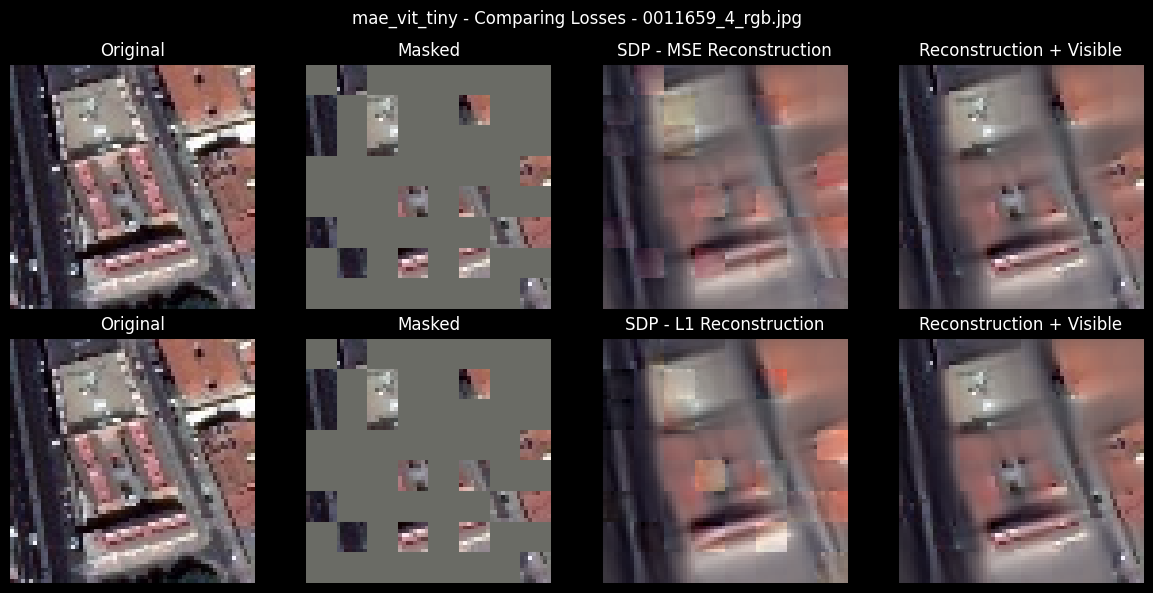

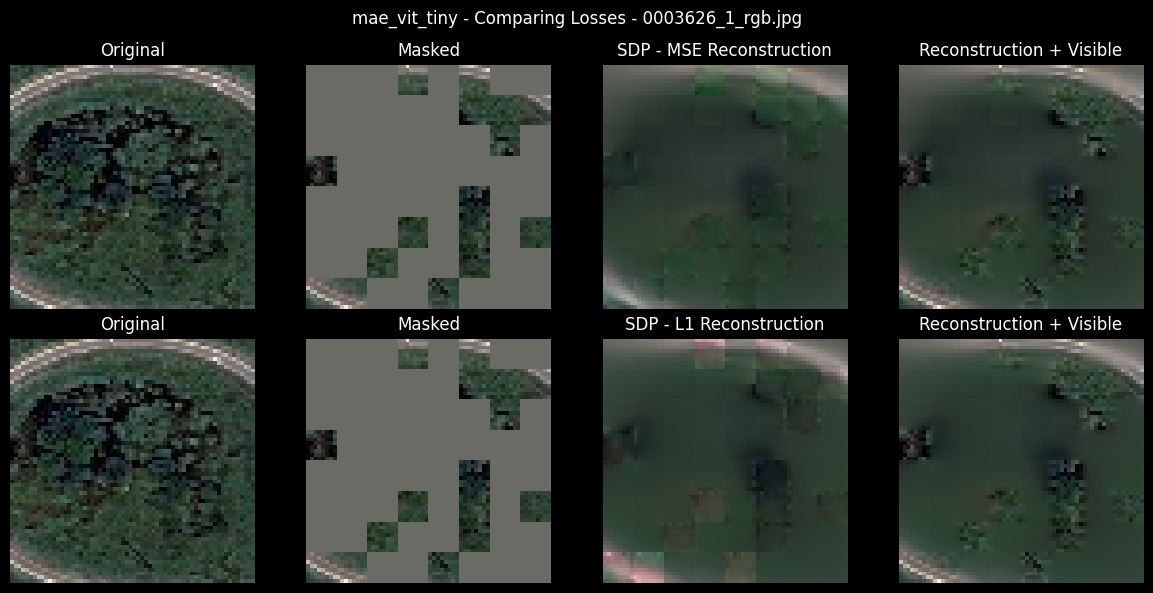

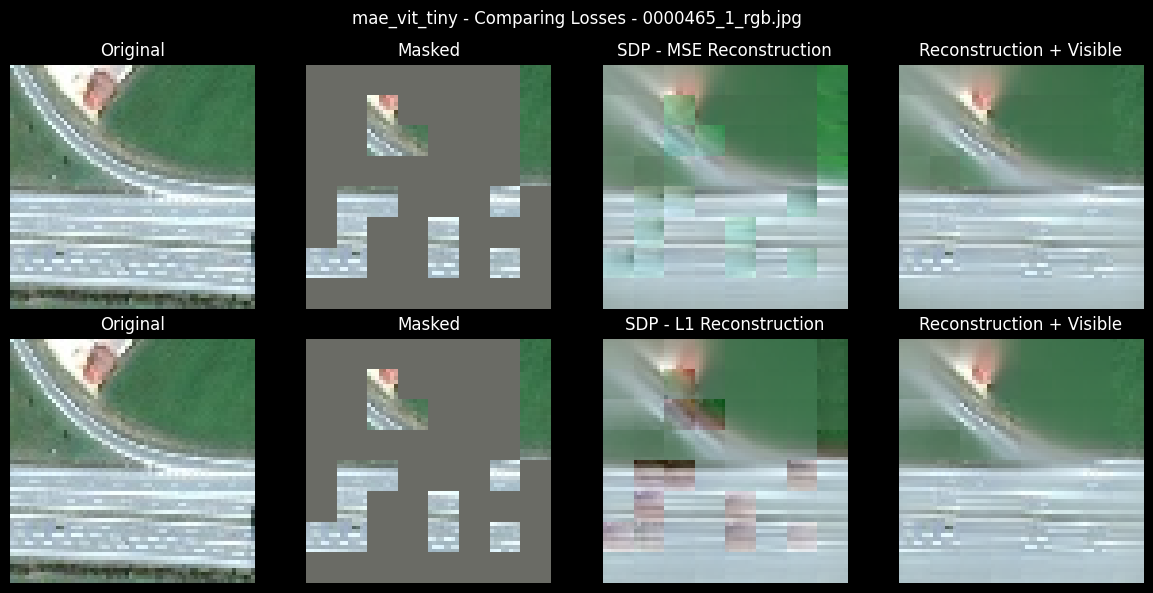

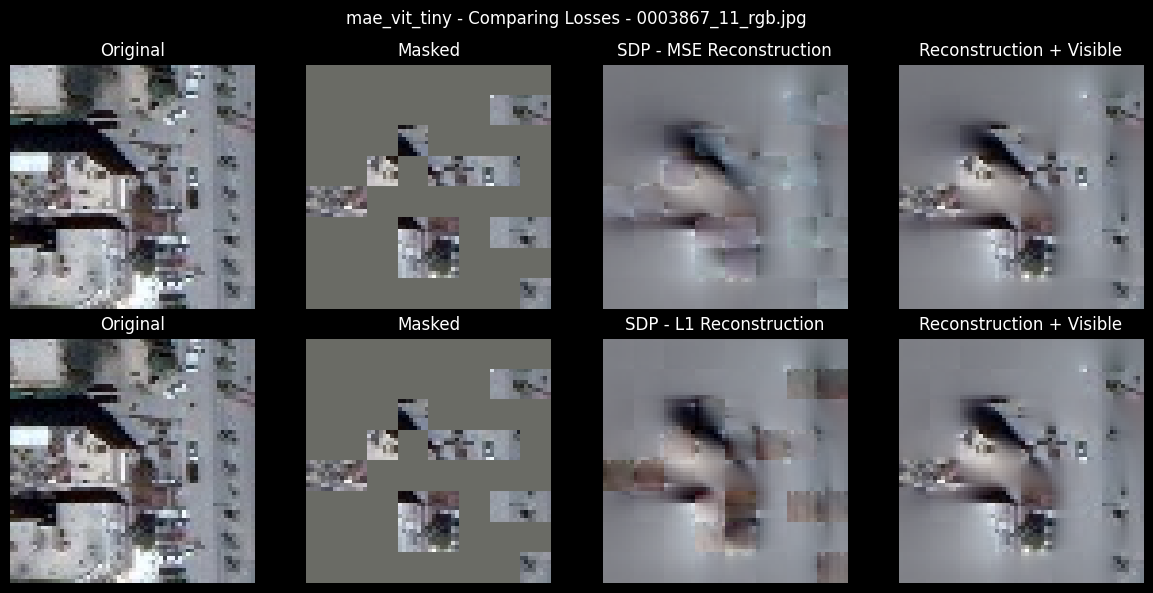

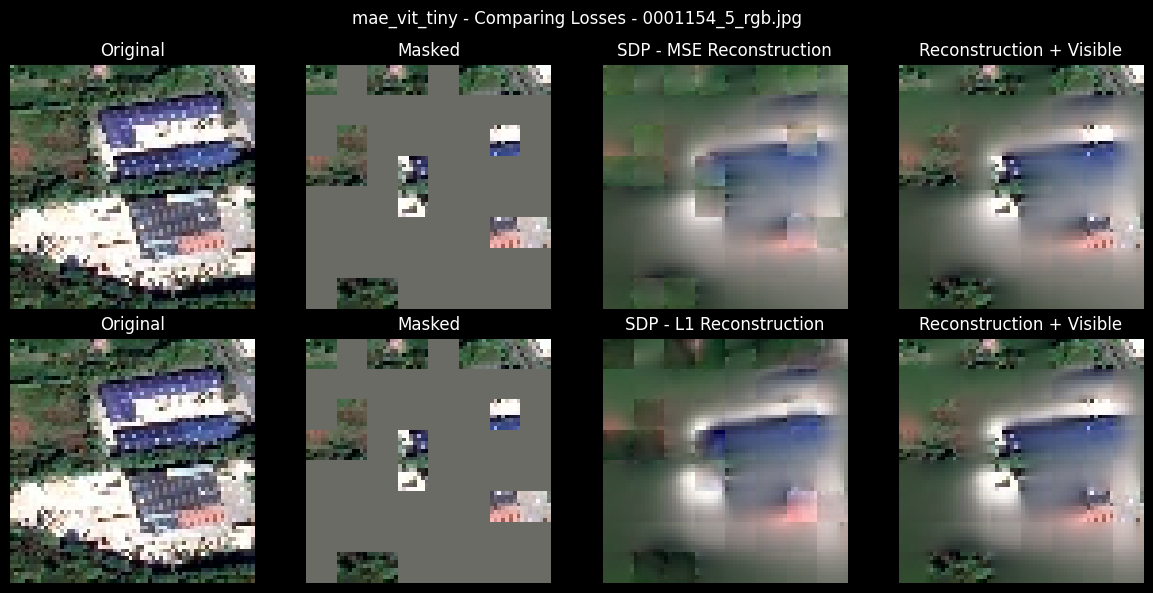

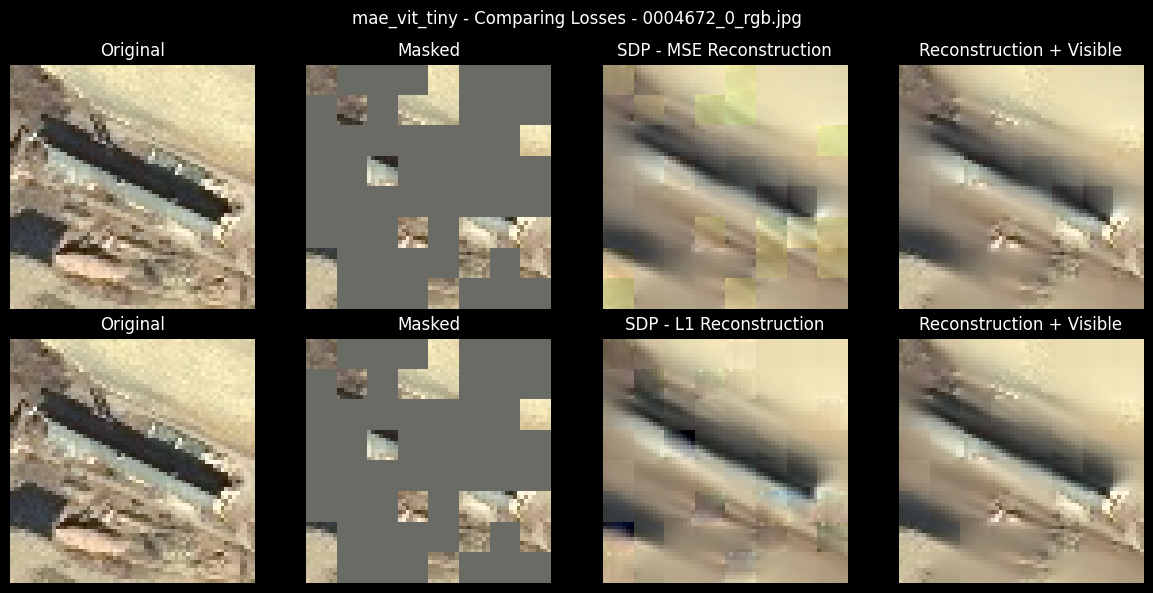

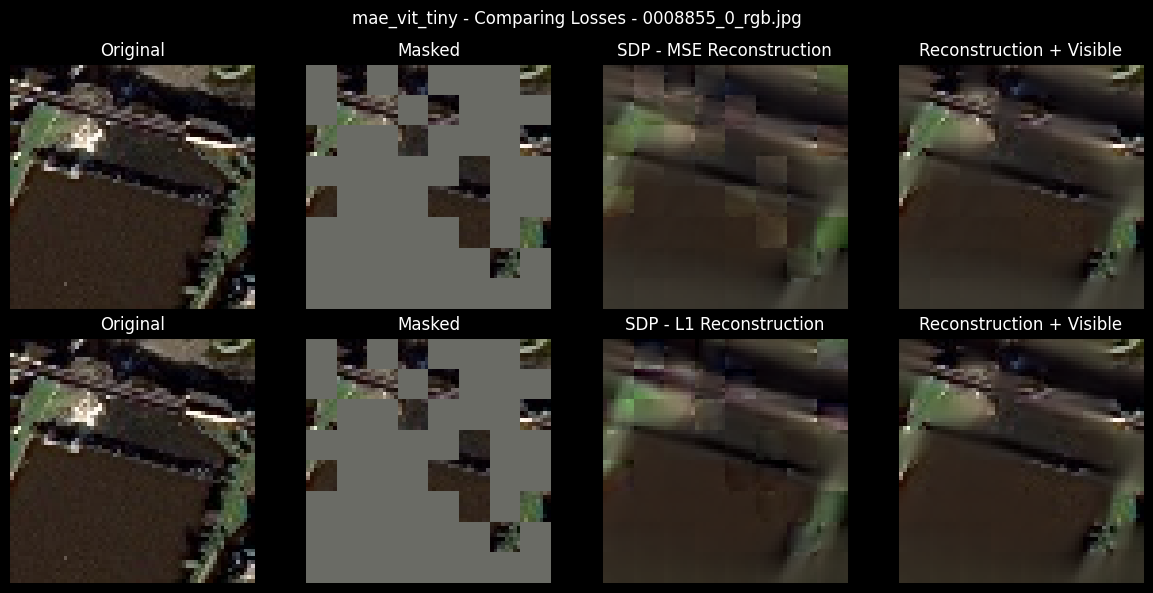

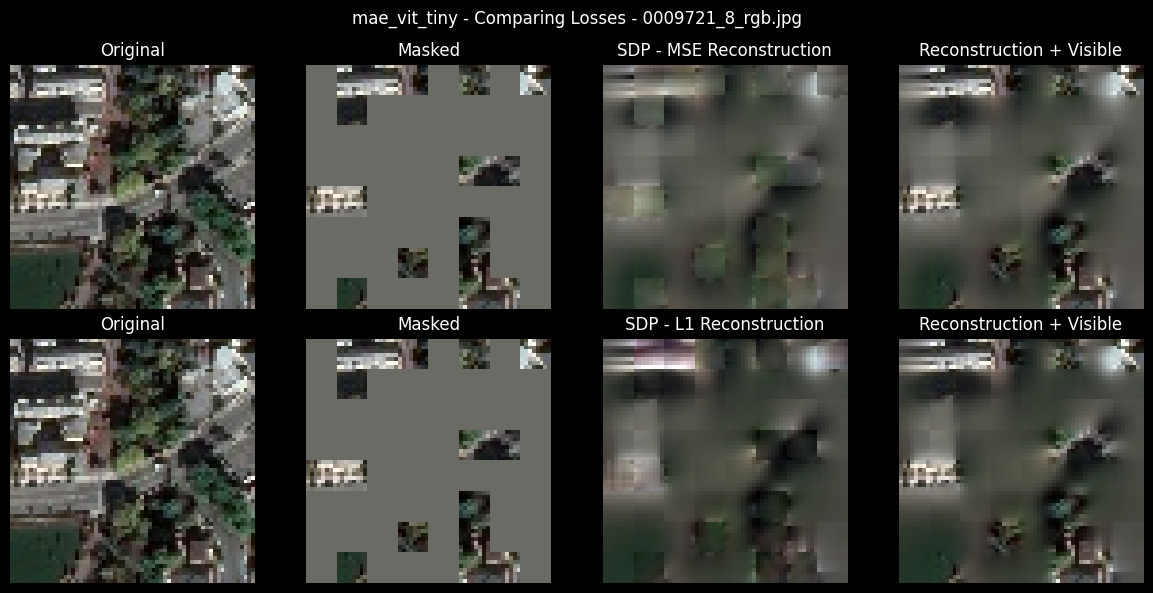

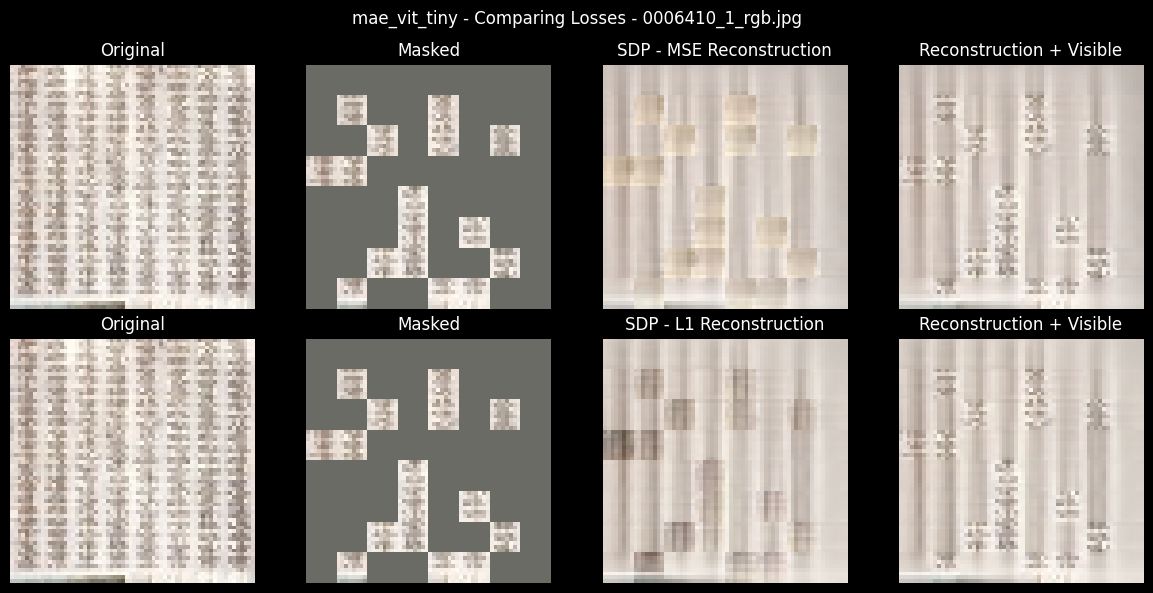

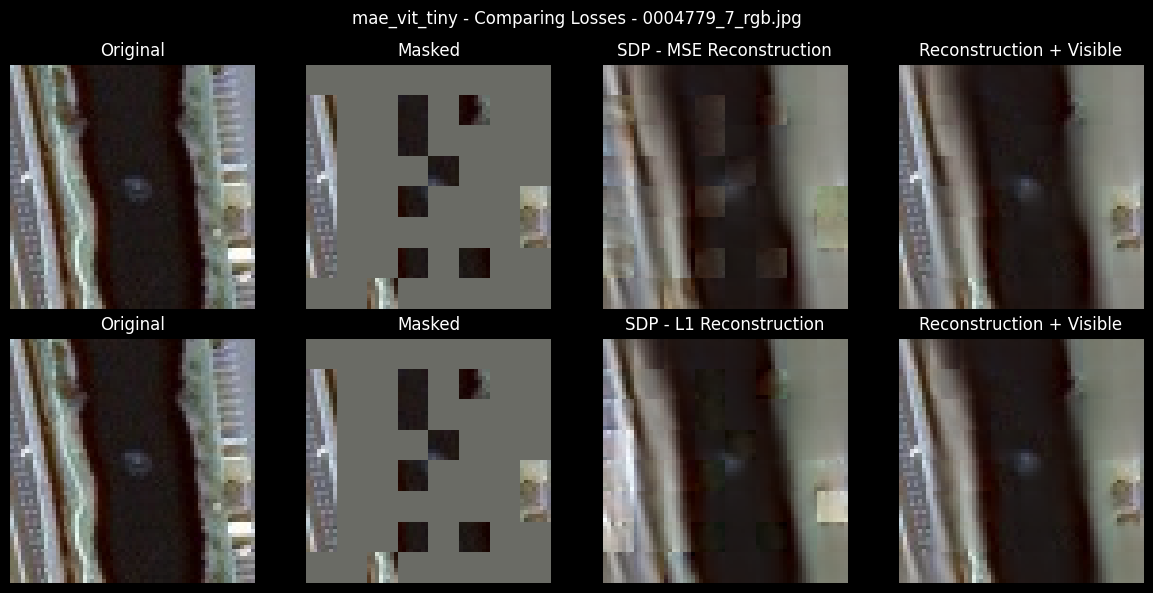

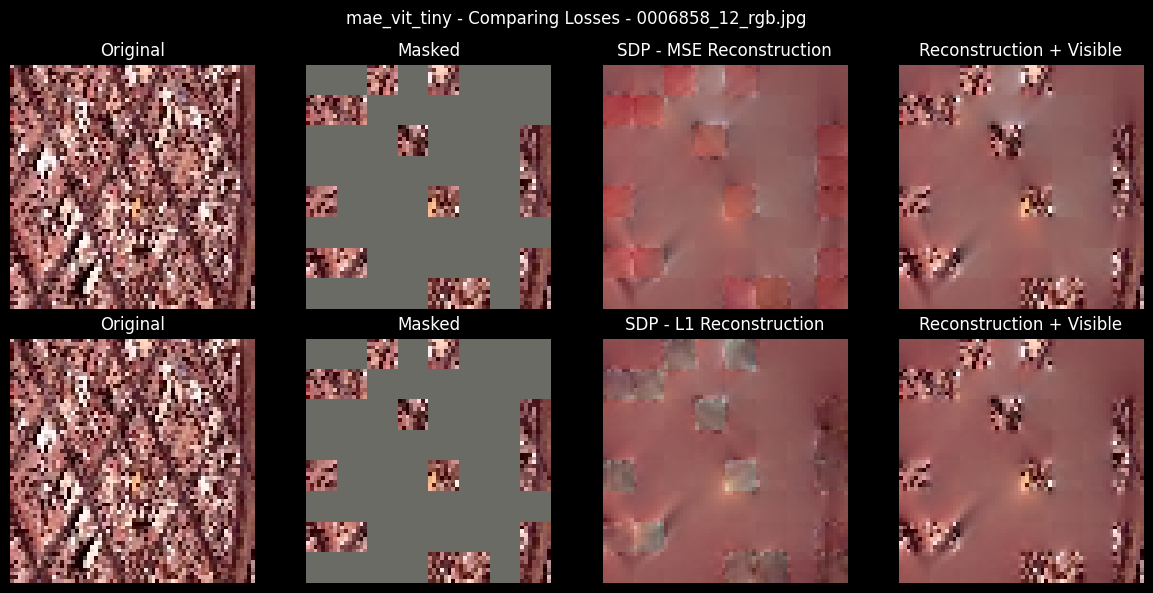

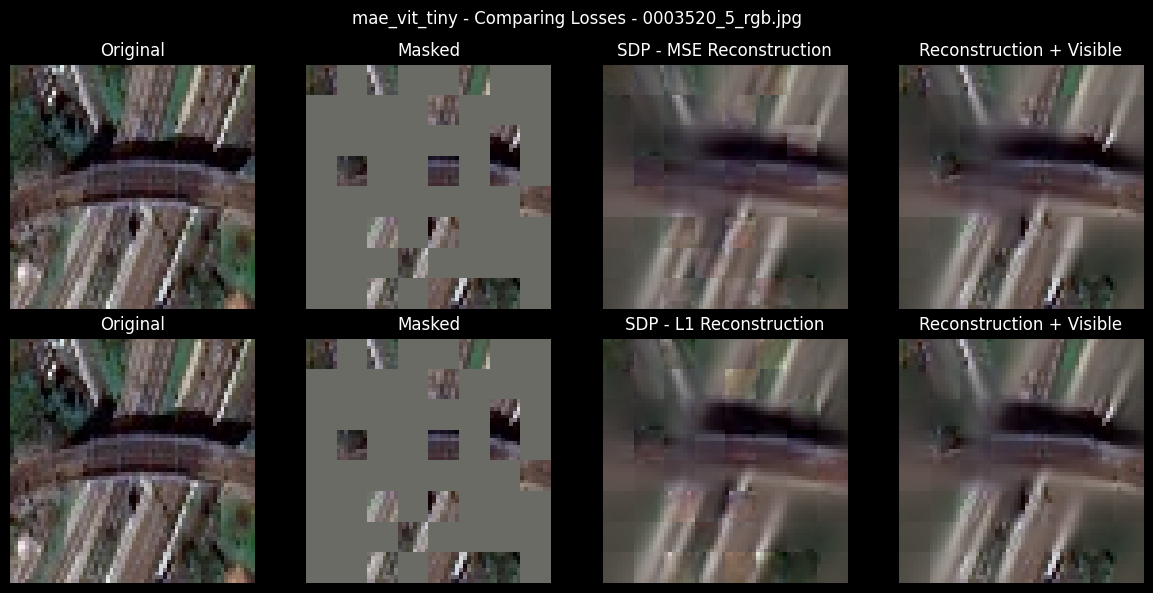

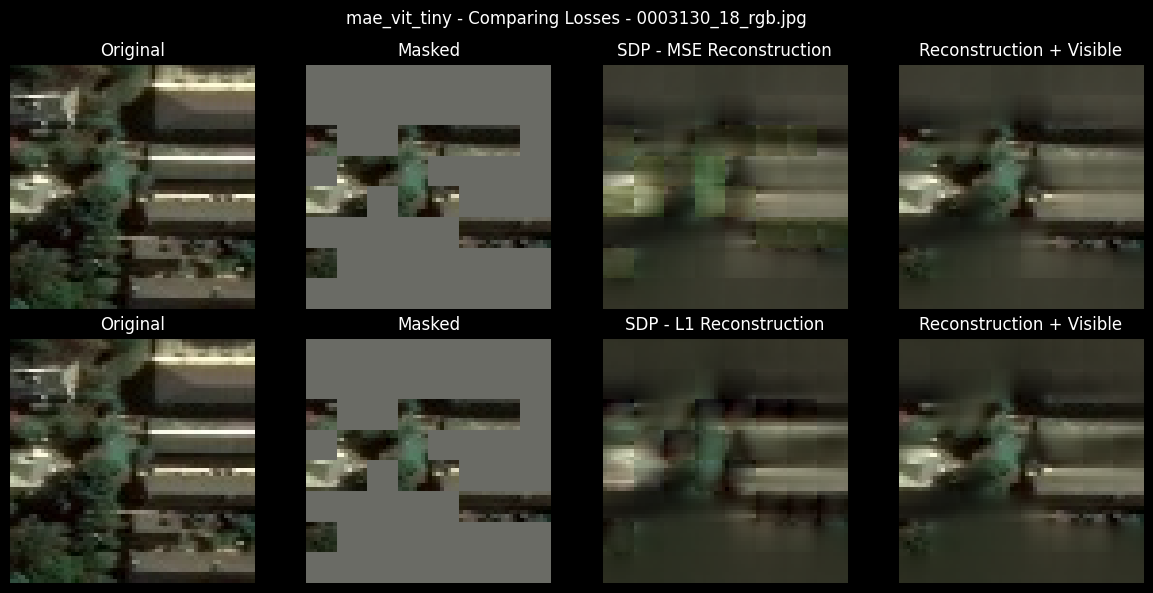

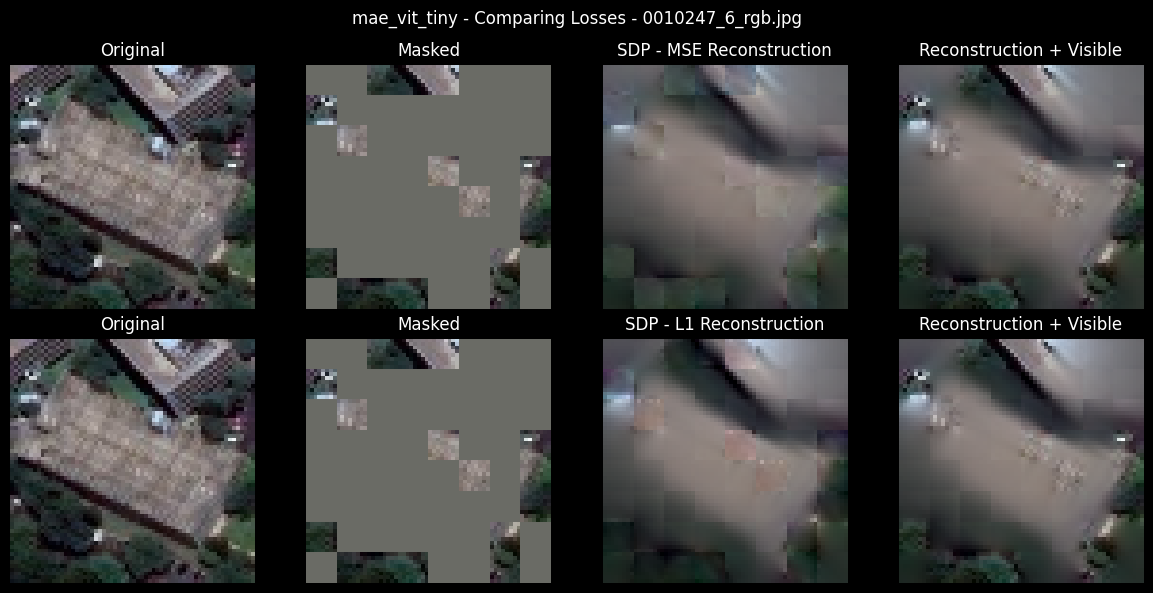

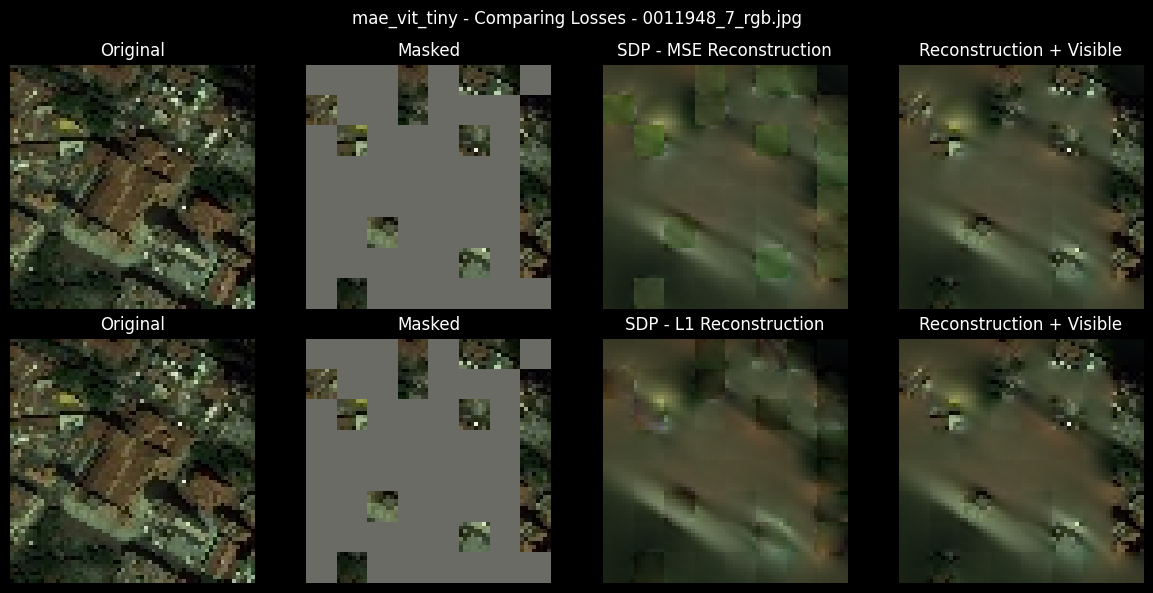

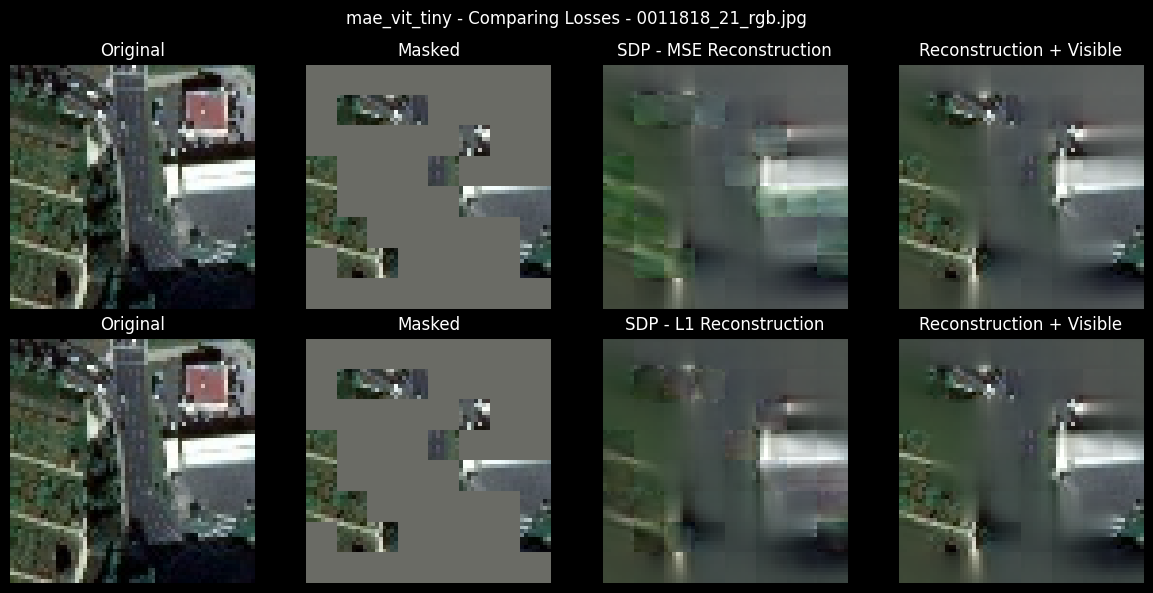

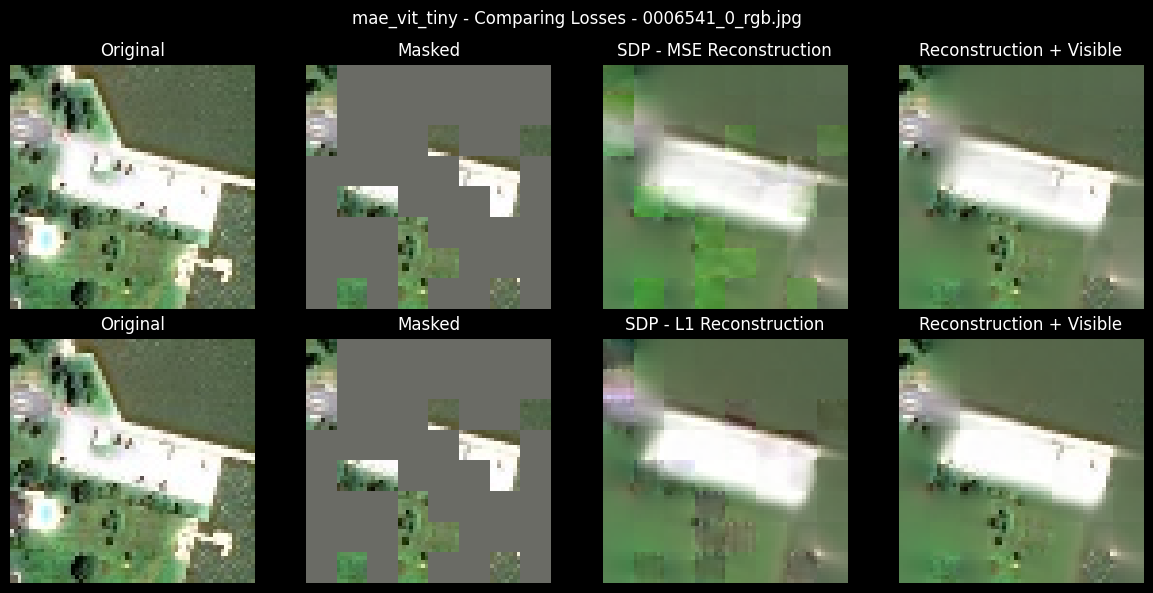

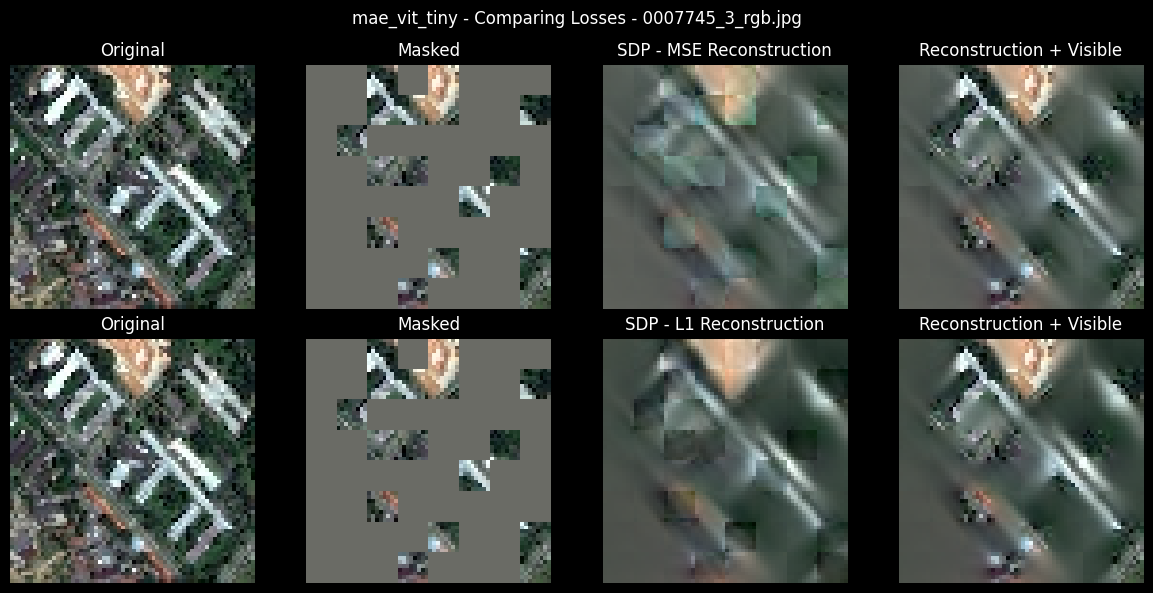

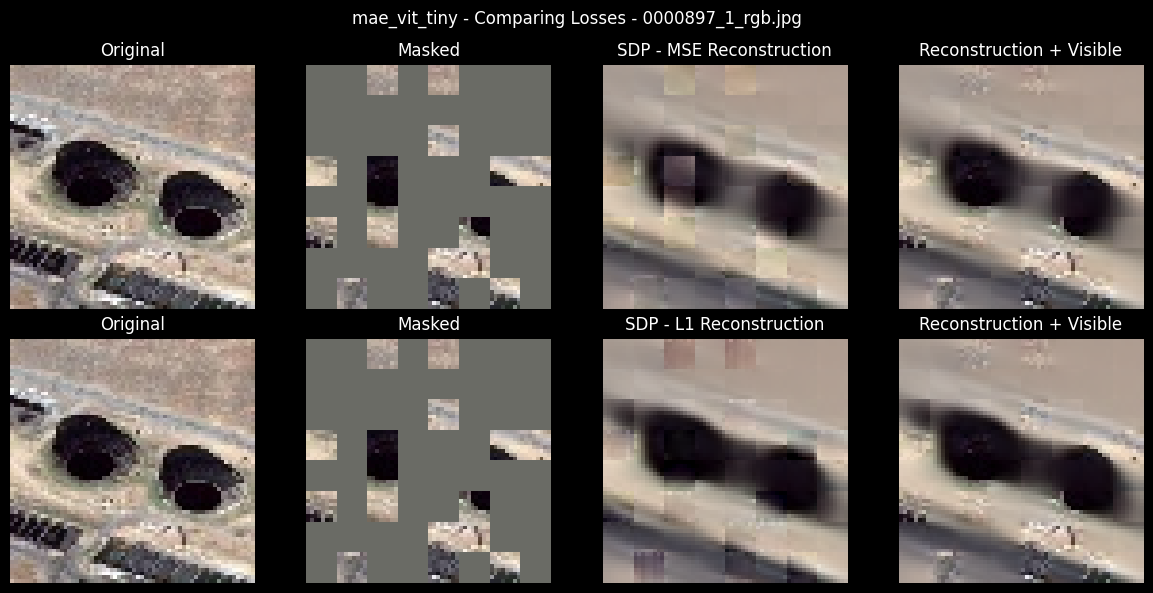

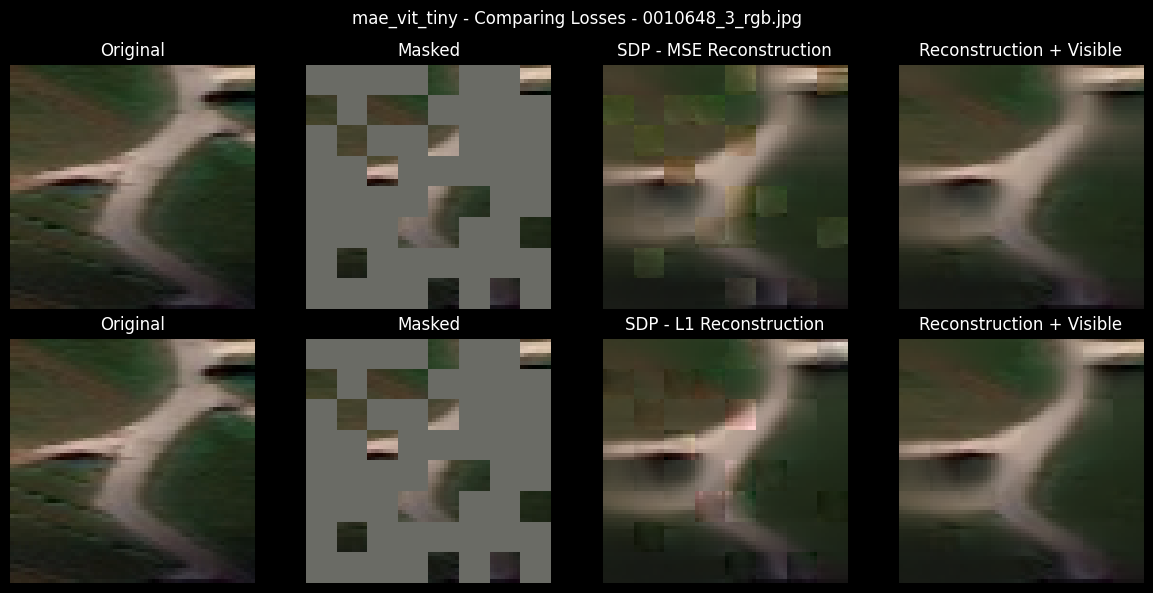

In [163]:
viz.plot_comp_many(
    models,
    "../fmow-rgb-preproc/data_64/input/test_data/test/",
    base_title=f"{common_architecture} - Comparing Losses",
    random_walk=True,
    walkseed=123,
    max_img_samples=20,
    maskseed=None,
)